In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

file_path = 'Data.xlsx' 
Base1 = pd.read_excel(file_path, sheet_name='Base 1')  
Base2 = pd.read_excel(file_path, sheet_name='Base 2')  
Base3 = pd.read_excel(file_path, sheet_name='Base 3')  
Base4 = pd.read_excel(file_path, sheet_name='Base 4')  
Katherine = pd.read_excel(file_path, sheet_name='Katherine')  
ClosedRing = pd.read_excel(file_path, sheet_name='ClosedRing')  




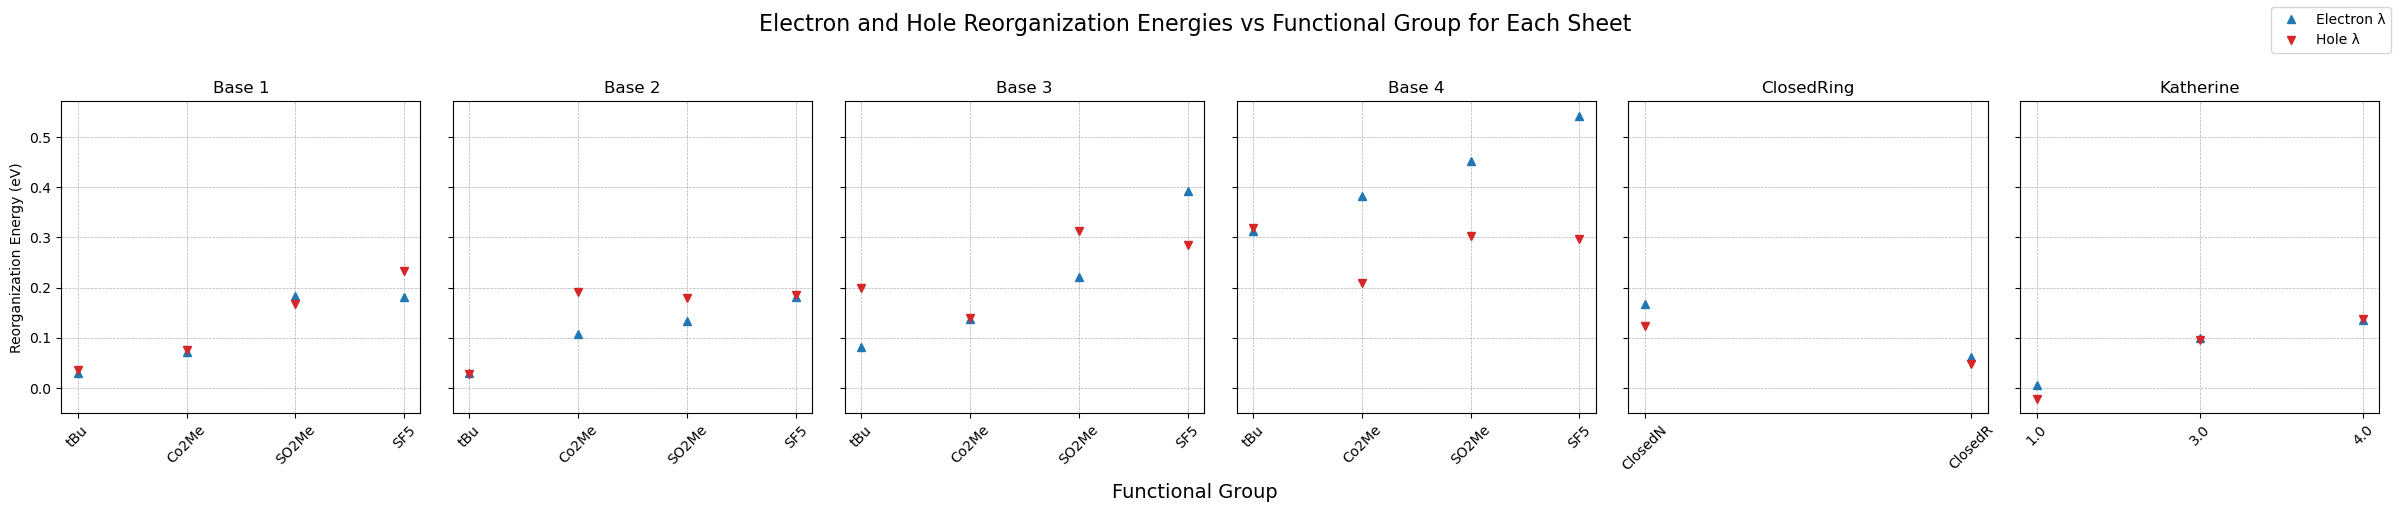

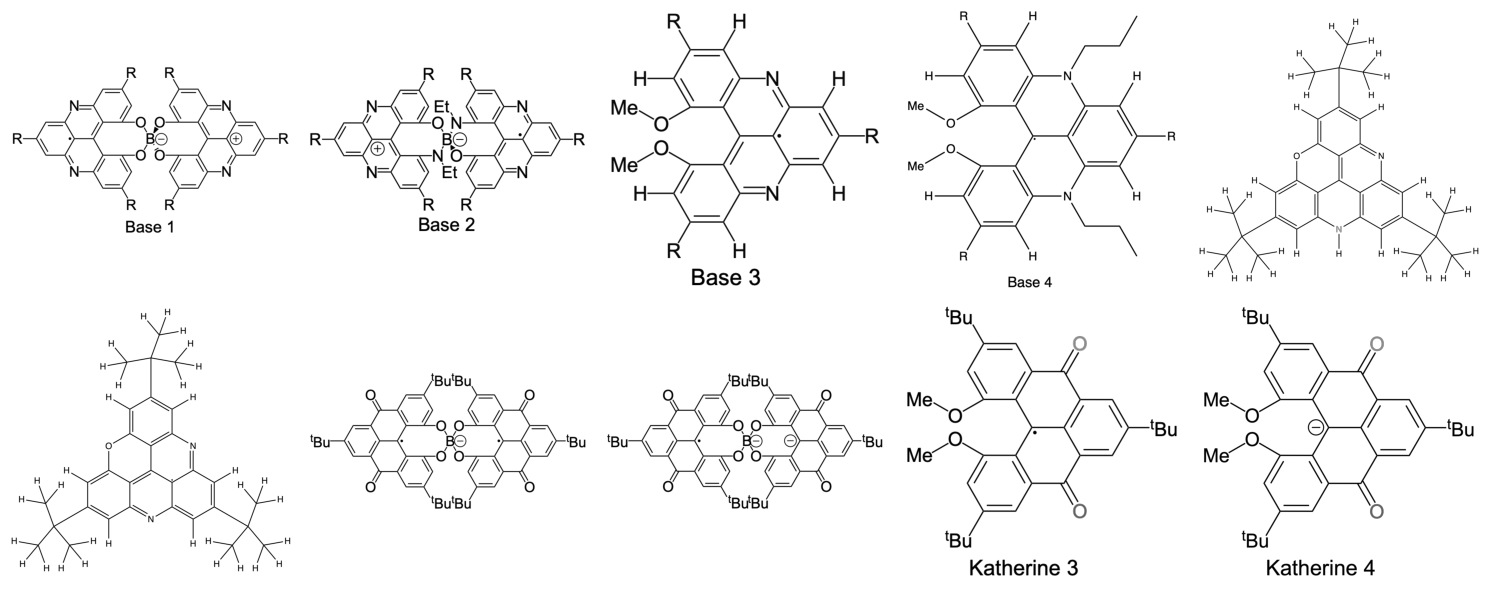

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File path and sheets
file_path = "Data.xlsx"
sheet_names = ["Base 1", "Base 2", "Base 3", "Base 4", "ClosedRing", "Katherine"]

# Prepare figure
fig, axes = plt.subplots(1, len(sheet_names), figsize=(24, 5), sharey=True)

# Loop through sheets and plot data
for ax, sheet in zip(axes, sheet_names):
    # Read data
    df = pd.read_excel(file_path, sheet_name=sheet)

    # Rename columns for clarity
    df = df.rename(columns={"reorg_e": "e_reorg", "reorg_h": "h_reorg"})

    # Extract relevant columns
    df_filtered = df[["e- mobility", "e_reorg", "h_reorg"]].dropna()

    # Convert to numeric explicitly
    for col in ["e_reorg", "h_reorg"]:
        df_filtered[col] = pd.to_numeric(df_filtered[col], errors="coerce")

    # Remove NaN after conversion
    df_filtered = df_filtered.dropna()

    # Extract arrays
    functional_groups = df_filtered["e- mobility"].astype(str).values
    electron_reorg = df_filtered["e_reorg"].values.astype(float)
    hole_reorg = df_filtered["h_reorg"].values.astype(float)

    # x-axis positions
    x_pos = np.arange(len(functional_groups))

    # Plot electron and hole reorg energies
    ax.plot(x_pos, electron_reorg, '^', color='#1f77b4', linewidth=1.5, label='Electron λ')
    ax.plot(x_pos, hole_reorg, 'v', color='#d62728', linewidth=1.5, label='Hole λ')

    # Customizing individual plot
    ax.set_title(sheet)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(df_filtered["e- mobility"].astype(str).values, rotation=45)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Common Y axis
axes[0].set_ylabel("Reorganization Energy (eV)")

# Single legend for all plots
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# Common labels and title
fig.suptitle("Electron and Hole Reorganization Energies vs Functional Group for Each Sheet", fontsize=16)
fig.text(0.5, 0.01, 'Functional Group', ha='center', fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('reorg_all.png', dpi=300)  # Recommended formats: PDF, PNG, JPG
plt.show()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load images
image_paths = [
    "MoleculeImages/Base1.png",
    "MoleculeImages/Base2.png",
    "MoleculeImages/Base3.png",
    "MoleculeImages/Base4.png",
    "MoleculeImages/ClosedN.png",
    "MoleculeImages/ClosedR.png",
    "MoleculeImages/Katherine1.png",
    "MoleculeImages/Katherine2.png",
    "MoleculeImages/Katherine3.png",
    "MoleculeImages/Katherine4.png"
]

# Load images dynamically (handle missing files)
images = []
for img_path in image_paths:
    try:
        images.append(mpimg.imread(img_path))
    except FileNotFoundError:
        print(f"Warning: {img_path} not found, skipping.")

# Create a 2x5 grid for displaying images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Adjust width/height

# Plot images on the grid
for i, ax in enumerate(axes.ravel()):
    if i < len(images):
        ax.imshow(images[i])
    ax.axis("off")  # Hide axis labels

# Adjust layout
plt.tight_layout()
plt.show()


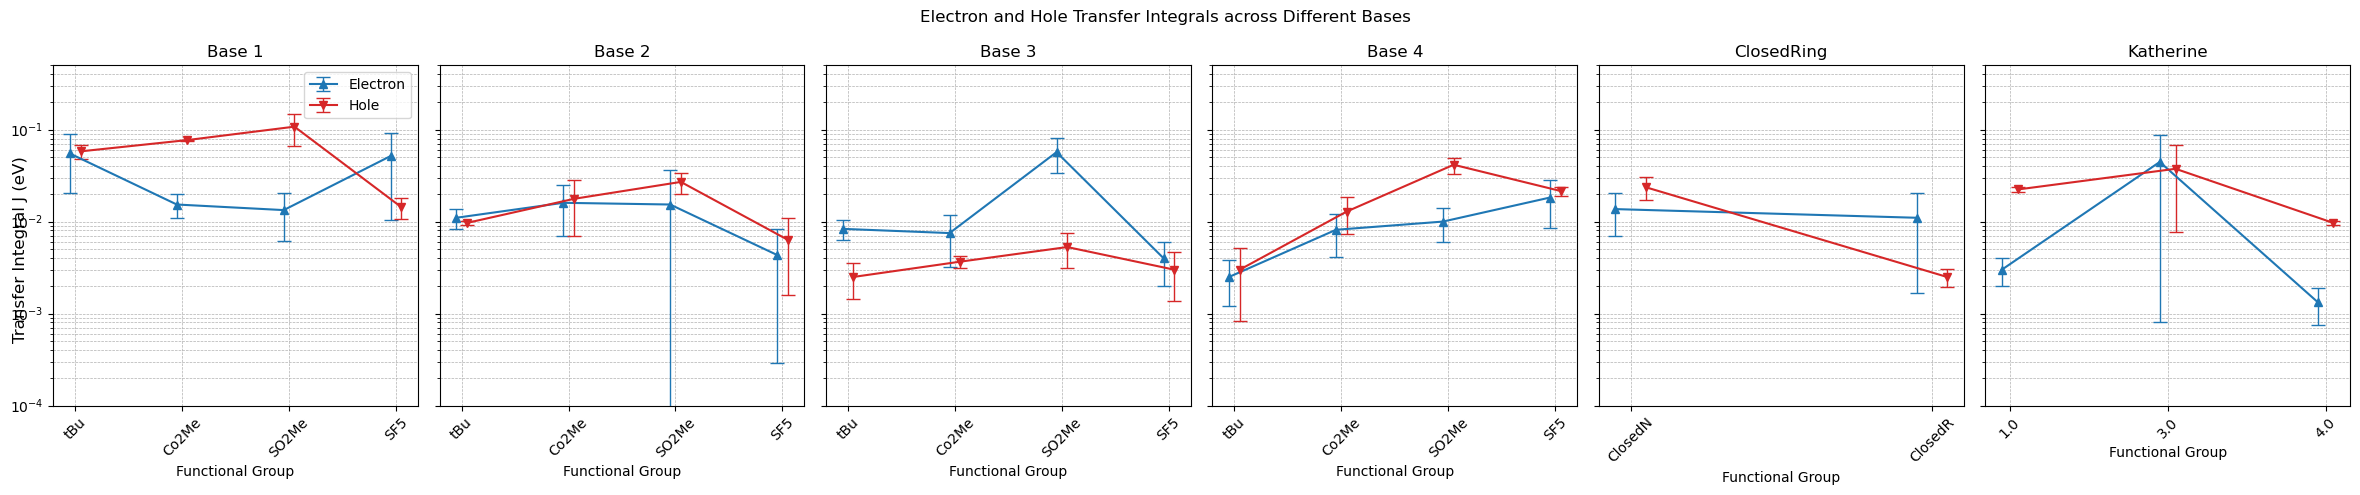

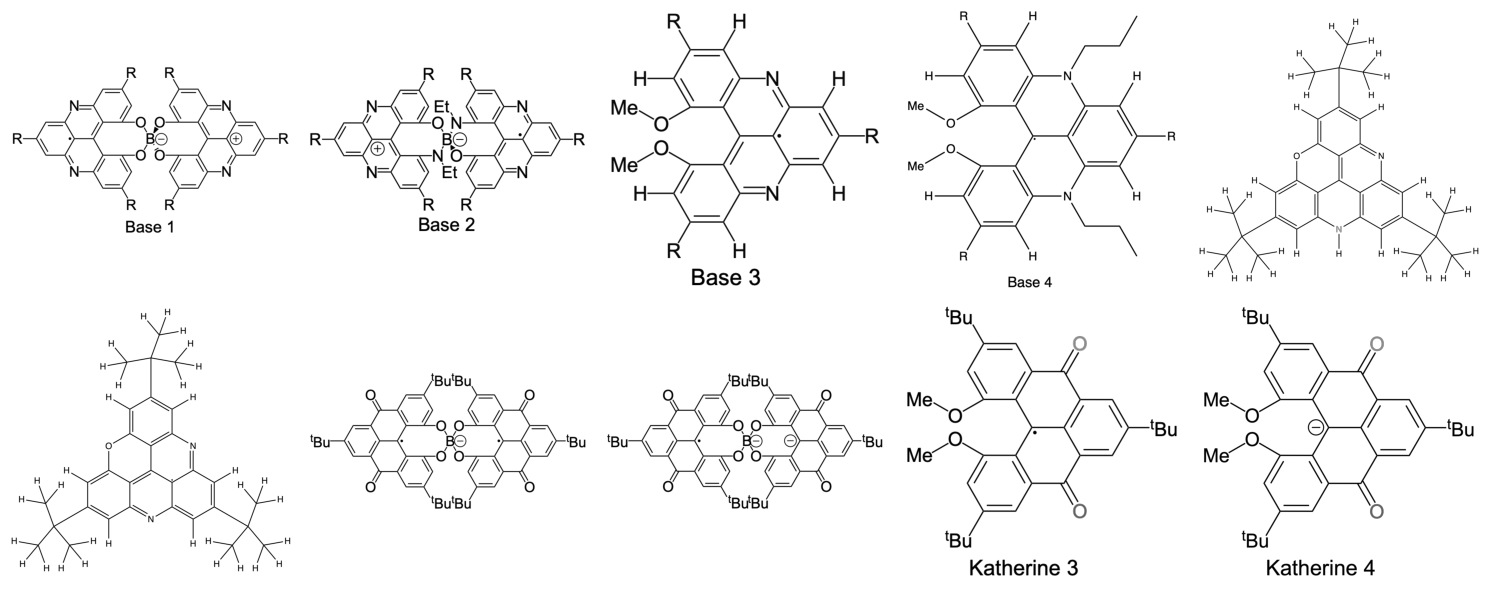

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = "Data.xlsx"  # Replace with your actual file
sheets = ["Base 1", "Base 2", "Base 3", "Base 4", "ClosedRing", "Katherine"]  # List of sheet names

# Create figure with subplots
fig, axes = plt.subplots(1, 6, figsize=(24, 5), sharey=True)

# Loop through each sheet and plot
for i, sheet in enumerate(sheets):
    df = pd.read_excel(file_path, sheet_name=sheet)
    
    # Rename columns for clarity
    df = df.rename(columns={"J_mean_e": "e_J_mean", "J_std_e": "e_J_std", "J_mean_h": "h_J_mean", "J_std_h": "h_J_std"})
    
    # Extract relevant columns while ensuring proper alignment
    df_filtered = df[["e- mobility", "e_J_mean", "e_J_std", "h_J_mean", "h_J_std"]].dropna()
    
    # Convert numeric columns explicitly
    numeric_columns = ["e_J_mean", "e_J_std", "h_J_mean", "h_J_std"]
    df_filtered[numeric_columns] = df_filtered[numeric_columns].apply(pd.to_numeric, errors="coerce")
    
    # Drop rows where conversion resulted in NaN
    df_filtered = df_filtered.dropna()
    
    # Assign variables
    functional_groups = df_filtered["e- mobility"].astype(str).values  # Ensure functional groups are strings
    electron_J = df_filtered["e_J_mean"].values.astype(float)
    electron_J_std = df_filtered["e_J_std"].values.astype(float)
    hole_J = df_filtered["h_J_mean"].values.astype(float)
    hole_J_std = df_filtered["h_J_std"].values.astype(float)
    
    # Create x-axis positions for categorical labels
    x_pos = np.arange(len(functional_groups))
    offset = 0.05  # Adjust to prevent overlap
    
    # Ensure no negative values for error bars on log scale
    electron_J_std_lower = np.minimum(electron_J_std, electron_J - 1e-5)
    hole_J_std_lower = np.minimum(hole_J_std, hole_J - 1e-5)
    
    # Define asymmetric error bars
    electron_yerr = [electron_J_std_lower, electron_J_std]
    hole_yerr = [hole_J_std_lower, hole_J_std]
    
    # Plot data on respective subplot
    ax = axes[i]
    ax.errorbar(
        x_pos - offset, electron_J, yerr=electron_yerr,
        fmt='^-', color='#1f77b4', capsize=5, elinewidth=1, linewidth=1.5, label='Electron'
    )
    ax.errorbar(
        x_pos + offset, hole_J, yerr=hole_yerr,
        fmt='v-', color='#d62728', capsize=5, elinewidth=1, linewidth=1.5, label='Hole'
    )
    
    # Customize subplot
    ax.set_xlabel("Functional Group")
    ax.set_title(sheet)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(functional_groups, rotation=45)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    
# Global settings
fig.supylabel("Transfer Integral J (eV)")
fig.suptitle("Electron and Hole Transfer Integrals across Different Bases")
axes[0].legend()
ax.set_yscale("log")
ax.set_ylim(1e-4, 5e-1)
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load images
image_paths = [
    "MoleculeImages/Base1.png",
    "MoleculeImages/Base2.png",
    "MoleculeImages/Base3.png",
    "MoleculeImages/Base4.png",
    "MoleculeImages/ClosedN.png",
    "MoleculeImages/ClosedR.png",
    "MoleculeImages/Katherine1.png",
    "MoleculeImages/Katherine2.png",
    "MoleculeImages/Katherine3.png",
    "MoleculeImages/Katherine4.png"
]

# Load images dynamically (handle missing files)
images = []
for img_path in image_paths:
    try:
        images.append(mpimg.imread(img_path))
    except FileNotFoundError:
        print(f"Warning: {img_path} not found, skipping.")

# Create a 2x5 grid for displaying images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Adjust width/height

# Plot images on the grid
for i, ax in enumerate(axes.ravel()):
    if i < len(images):
        ax.imshow(images[i])
    ax.axis("off")  # Hide axis labels

# Adjust layout
plt.tight_layout()
plt.show()



Base 3 


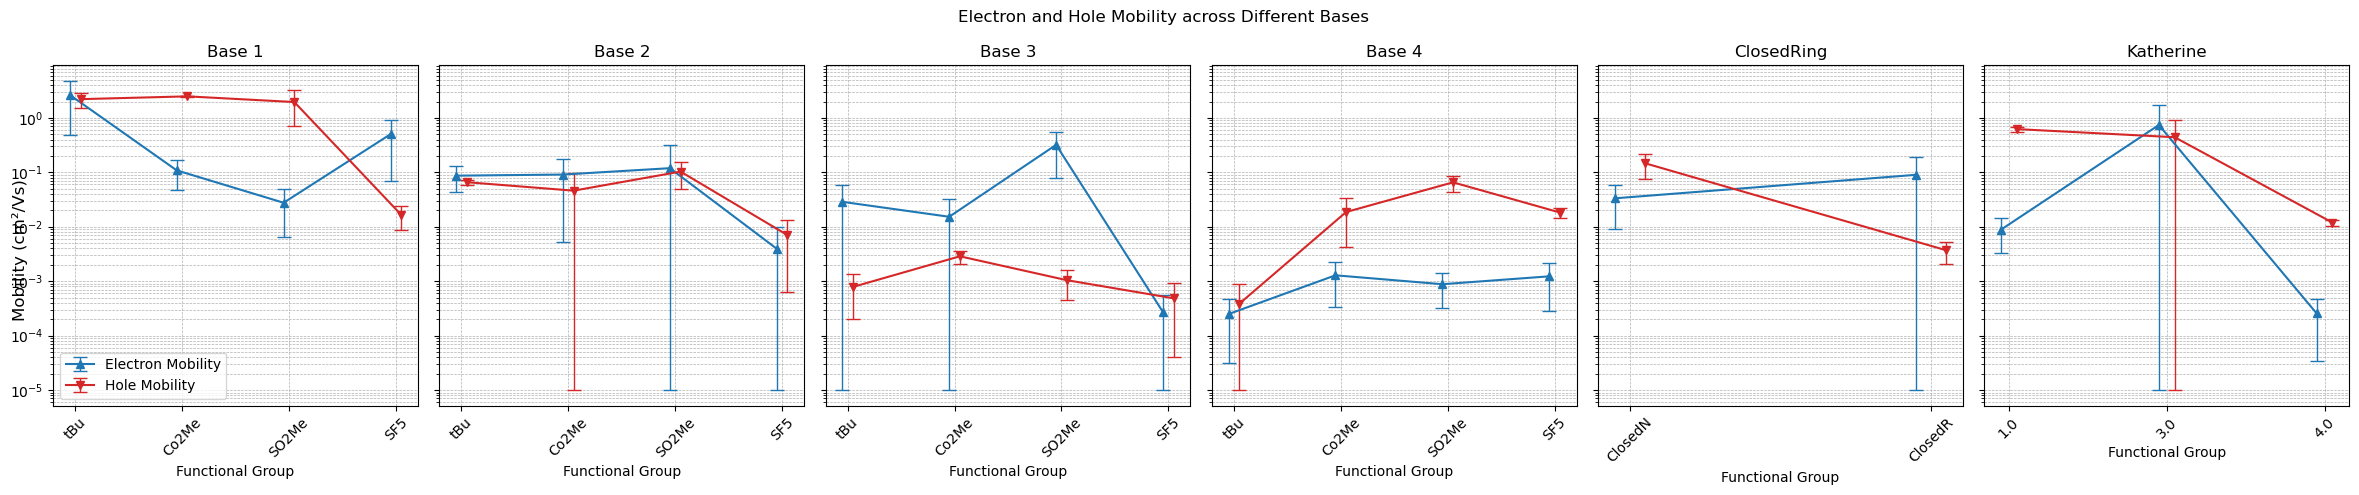

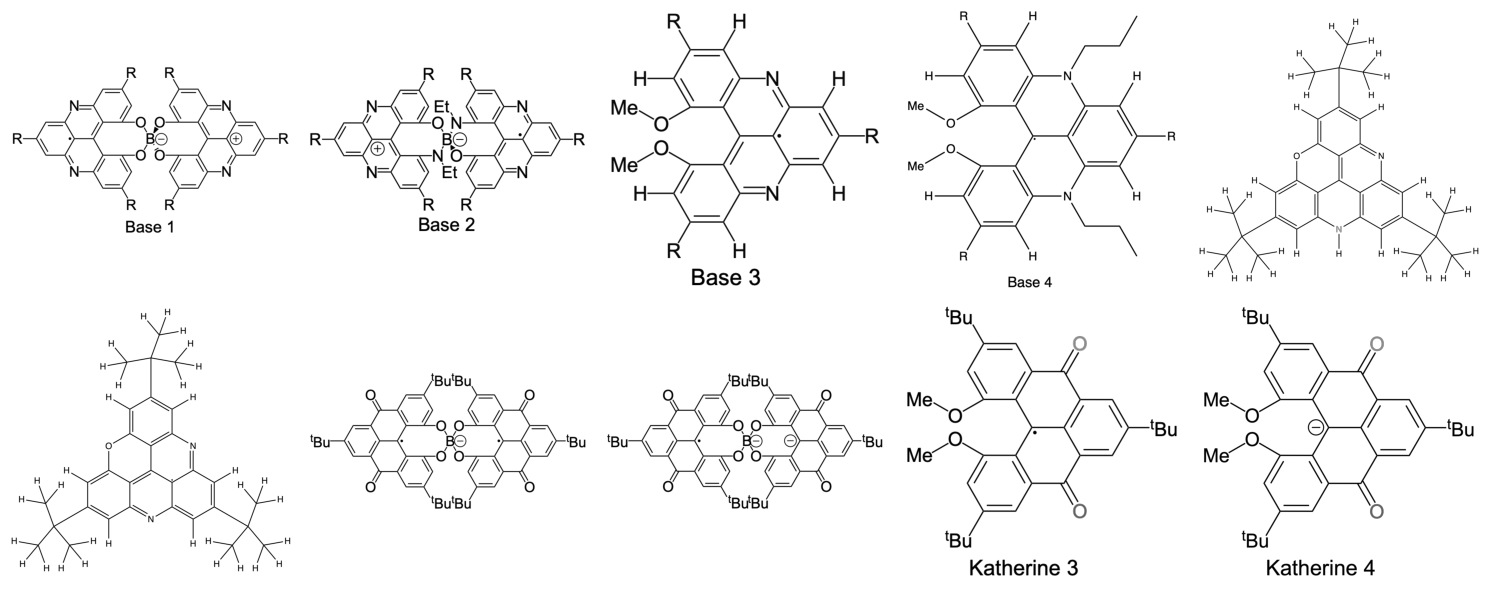

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = "Data.xlsx"  # Replace with your actual file
sheets = ["Base 1", "Base 2", "Base 3", "Base 4", "ClosedRing", "Katherine"]  # List of sheet names

# Create figure with subplots
fig, axes = plt.subplots(1, 6, figsize=(24, 5), sharey=True)

# Loop through each sheet and plot
for i, sheet in enumerate(sheets):
    df = pd.read_excel(file_path, sheet_name=sheet)
    
    # Rename columns for clarity
    df = df.rename(columns={"mean": "e_mean", "std": "e_std", "mean.1": "h_mean", "std.1": "h_std"})
    
    # Extract relevant columns while ensuring proper alignment
    df_filtered = df[["e- mobility", "e_mean", "e_std", "h+ mobility", "h_mean", "h_std"]].dropna()
    
    # Convert numeric columns explicitly
    numeric_columns = ["e_mean", "e_std", "h_mean", "h_std"]
    df_filtered[numeric_columns] = df_filtered[numeric_columns].apply(pd.to_numeric, errors="coerce")
    
    # Drop rows where conversion resulted in NaN
    df_filtered = df_filtered.dropna()
    
    # Assign variables
    functional_groups = df_filtered["e- mobility"].astype(str).values  # Ensure functional groups are strings
    electron_mobility = df_filtered["e_mean"].values.astype(float)
    electron_mobility_std = df_filtered["e_std"].values.astype(float)
    hole_mobility = df_filtered["h_mean"].values.astype(float)
    hole_mobility_std = df_filtered["h_std"].values.astype(float)
    
    # Create x-axis positions for categorical labels
    x_pos = np.arange(len(functional_groups))
    offset = 0.05  # Adjust to prevent overlap
    
    # Ensure no negative values for error bars on log scale
    electron_mobility_std_lower = np.minimum(electron_mobility_std, electron_mobility - 1e-5)
    hole_mobility_std_lower = np.minimum(hole_mobility_std, hole_mobility - 1e-5)
    
    # Define asymmetric error bars
    electron_yerr = [electron_mobility_std_lower, electron_mobility_std]
    hole_yerr = [hole_mobility_std_lower, hole_mobility_std]
    
    # Plot data on respective subplot
    ax = axes[i]
    ax.errorbar(
        x_pos - offset, electron_mobility, yerr=electron_yerr,
        fmt='^-', color='#1f77b4', capsize=5, elinewidth=1, linewidth=1.5, label='Electron Mobility'
    )
    ax.errorbar(
        x_pos + offset, hole_mobility, yerr=hole_yerr,
        fmt='v-', color='#d62728', capsize=5, elinewidth=1, linewidth=1.5, label='Hole Mobility'
    )
    
    # Customize subplot
    ax.set_xlabel("Functional Group")
    ax.set_title(sheet)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(functional_groups, rotation=45)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    # Apply logarithmic scale
    ax.set_yscale("log")
    
# Global settings
fig.supylabel("Mobility (cm²/Vs)")
fig.suptitle("Electron and Hole Mobility across Different Bases")
axes[0].legend()
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load images
image_paths = [
    "MoleculeImages/Base1.png",
    "MoleculeImages/Base2.png",
    "MoleculeImages/Base3.png",
    "MoleculeImages/Base4.png",
    "MoleculeImages/ClosedN.png",
    "MoleculeImages/ClosedR.png",
    "MoleculeImages/Katherine1.png",
    "MoleculeImages/Katherine2.png",
    "MoleculeImages/Katherine3.png",
    "MoleculeImages/Katherine4.png"
]

# Load images dynamically (handle missing files)
images = []
for img_path in image_paths:
    try:
        images.append(mpimg.imread(img_path))
    except FileNotFoundError:
        print(f"Warning: {img_path} not found, skipping.")

# Create a 2x5 grid for displaying images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Adjust width/height

# Plot images on the grid
for i, ax in enumerate(axes.ravel()):
    if i < len(images):
        ax.imshow(images[i])
    ax.axis("off")  # Hide axis labels

# Adjust layout
plt.tight_layout()
plt.show()

